In [1]:
#CALCULATE THE THRESHOLD FOR THE FEATURES AND BINARIZE COLUMNS

import pandas as pd
import numpy as np

def mean_threshold(data):
    return np.mean(data)

def median_threshold(data):
    return np.median(data)

def percentile_threshold(data, percentile):
    return np.percentile(data, percentile)

def calculate_best_threshold(data):
    mean_thr = mean_threshold(data)
    median_thr = median_threshold(data)
    percentile_75_thr = percentile_threshold(data, 75)

    # Calculate the standard deviation for each threshold
    mean_std = np.std(data >= mean_thr)
    median_std = np.std(data >= median_thr)
    percentile_75_std = np.std(data >= percentile_75_thr)

    # Choose the threshold with the smallest standard deviation
    min_std = min(mean_std, median_std, percentile_75_std)
    if min_std == mean_std:
        return 'mean', mean_thr
    elif min_std == median_std:
        return 'median', median_thr
    else:
        return 'percentile', percentile_75_thr

def binarize_data(data, threshold):
    return (data >= threshold).astype(int)

# Load the CSV file
csv_file = '../data_final/spotify_data_downloaded_songs.csv'
df = pd.read_csv(csv_file)

# Select the column (feature) you want to analyze
feature_column = 'danceability'
data = df[feature_column].values
# Calculate the best threshold
best_method, threshold = calculate_best_threshold(data)
print(f"Best method: {best_method}, Threshold: {threshold}")
# Binarize the selected column using the calculated threshold
df[feature_column] = binarize_data(data, threshold)

# Select the column (feature) you want to analyze
feature_column = 'energy'
data = df[feature_column].values
# Calculate the best threshold
best_method, threshold = calculate_best_threshold(data)
print(f"Best method: {best_method}, Threshold: {threshold}")
# Binarize the selected column using the calculated threshold
df[feature_column] = binarize_data(data, threshold)

# Select the column (feature) you want to analyze
feature_column = 'loudness'
data = df[feature_column].values
# Calculate the best threshold
best_method, threshold = calculate_best_threshold(data)
print(f"Best method: {best_method}, Threshold: {threshold}")
# Binarize the selected column using the calculated threshold
df[feature_column] = binarize_data(data, threshold)

# Select the column (feature) you want to analyze
feature_column = 'acousticness'
data = df[feature_column].values
# Calculate the best threshold
best_method, threshold = calculate_best_threshold(data)
print(f"Best method: {best_method}, Threshold: {threshold}")
# Binarize the selected column using the calculated threshold
df[feature_column] = binarize_data(data, threshold)

# Select the column (feature) you want to analyze
feature_column = 'instrumentalness'
data = df[feature_column].values
# Calculate the best threshold
best_method, threshold = calculate_best_threshold(data)
print(f"Best method: {best_method}, Threshold: {threshold}")
# Binarize the selected column using the calculated threshold
df[feature_column] = binarize_data(data, threshold)

# Select the column (feature) you want to analyze
feature_column = 'liveness'
data = df[feature_column].values
# Calculate the best threshold
best_method, threshold = calculate_best_threshold(data)
print(f"Best method: {best_method}, Threshold: {threshold}")
# Binarize the selected column using the calculated threshold
df[feature_column] = binarize_data(data, threshold)

# Select the column (feature) you want to analyze
feature_column = 'valence'
data = df[feature_column].values
# Calculate the best threshold
best_method, threshold = calculate_best_threshold(data)
print(f"Best method: {best_method}, Threshold: {threshold}")
# Binarize the selected column using the calculated threshold
df[feature_column] = binarize_data(data, threshold)


# Save the DataFrame with the modified column back to the CSV file
df.to_csv(csv_file, index=False)


Best method: percentile, Threshold: 0.7172499999999999
Best method: percentile, Threshold: 0.80225
Best method: percentile, Threshold: -5.05125
Best method: percentile, Threshold: 0.424
Best method: mean, Threshold: 0.05984894328991596
Best method: percentile, Threshold: 0.247
Best method: percentile, Threshold: 0.6892499999999999


In [2]:
import pandas as pd

csv_file = '../data_final/spotify_data_downloaded_songs.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Filter the rows where the tempo is higher than 200 bpm
high_tempo_files = df[df['tempo'] > 200]['track_uri'].values.tolist()

# Print the names of the files with high tempo
print(f"The files with a tempo higher than 200 bpm are: {', '.join(high_tempo_files)}")


The files with a tempo higher than 200 bpm are: 2ZaWL12apL7wmNPuJMlny4, 4R7QVSqBN0koJHcOL7PGb5, 0l9vfqSNiJQhlgCB3IY6xM, 5cmvTvxqKFhr7U5sjNQ7Ce, 5X1cvJi4Ja7zEYvNwA0LXZ, 4D7WZMx6nXQ5X1mGl7JTlA, 6iajHa34cSiD5s42Cq9miJ, 4qYMcUZzsIYRNi7LnVV90v, 3DJzymVeQfMiPRgNSPUavd, 4htbAEZWr53J08x3dUv00W, 1kPBHRXyXdrtYfUfeRwBko, 06NVXNLIDTQumfjwGKIBzh, 0sygO45O9Gq8HGJ5ED1UDz, 0Ia4Nq8pLcJAfoQRtHIYAQ, 6VuNej6m4xlWdra1aTrcwh


Mean tempo: 121.21
Standard deviation of tempo: 28.94
Number of deleted songs with tempo outside the range of 63.34 to 179.09 BPM: 90
New mean tempo: 119.19
New standard deviation of tempo: 26.11
New number of songs: 2290


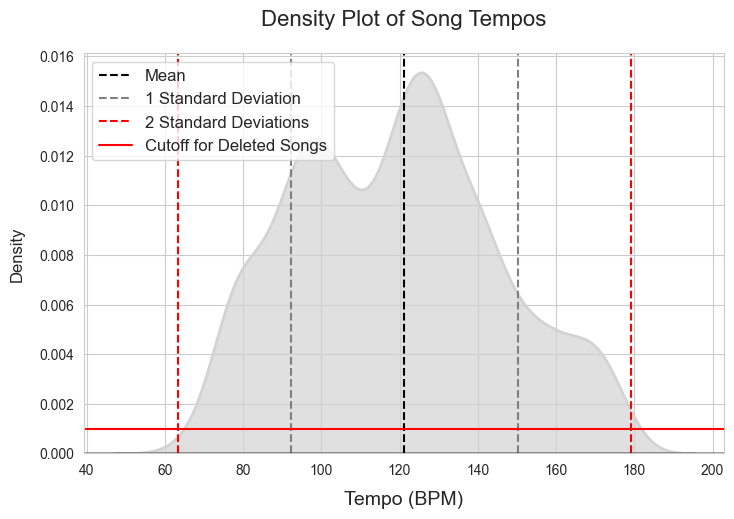

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

csv_file = '../data_final/spotify_data_downloaded_songs.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Calculate the mean and standard deviation of the tempo column
tempo_mean = df['tempo'].mean()
tempo_std = df['tempo'].std()

# Identify songs that are more than two standard deviations away from the mean
low_cutoff = tempo_mean - 2 * tempo_std
high_cutoff = tempo_mean + 2 * tempo_std
outlier_songs = df[(df['tempo'] < low_cutoff) | (df['tempo'] > high_cutoff)]

# Delete the outlier songs from the dataset
df = df.drop(outlier_songs.index)

# Save the updated dataframe as CSV
df.to_csv(csv_file, index=False)
df = df.reset_index(drop=True)  # Reset index after deleting rows

# Print some summary statistics about the tempo column
print(f"Mean tempo: {tempo_mean:.2f}")
print(f"Standard deviation of tempo: {tempo_std:.2f}")
print(f"Number of deleted songs with tempo outside the range of {low_cutoff:.2f} to {high_cutoff:.2f} BPM: {len(outlier_songs)}")
print(f"New mean tempo: {df['tempo'].mean():.2f}")
print(f"New standard deviation of tempo: {df['tempo'].std():.2f}")
print(f"New number of songs: {len(df)}")

# Create a density plot of the tempo column
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data=df, x='tempo', ax=ax, fill=True, alpha=0.7, color='lightgray', linewidth=2)

# Add vertical lines for the mean and standard deviation
ax.axvline(x=tempo_mean, color='black', linestyle='--', label='Mean', linewidth=1.5)
ax.axvline(x=tempo_mean - tempo_std, color='gray', linestyle='--', label='1 Standard Deviation', linewidth=1.5)
ax.axvline(x=tempo_mean + tempo_std, color='gray', linestyle='--', linewidth=1.5)
ax.axvline(x=tempo_mean - 2 * tempo_std, color='red', linestyle='--', label='2 Standard Deviations', linewidth=1.5)
ax.axvline(x=tempo_mean + 2 * tempo_std, color='red', linestyle='--', linewidth=1.5)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Add horizontal line for the cutoff for deleted songs
ax.axhline(y=0.001, color='red', linestyle='-', label='Cutoff for Deleted Songs', linewidth=1.5)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Add labels and a legend to the plot
ax.set_xlabel('Tempo (BPM)', fontsize=14, labelpad=10)
ax.set_ylabel('Density', fontsize=14, labelpad=10)
ax.set_title('Density Plot of Song Tempos', fontsize=16, pad=20)
ax.legend(fontsize=12, loc='upper left')

# Add annotation for the standard deviation
ax.annotate(f"1 SD = {tempo_std:.2f} BPM", xy=(tempo_mean - tempo_std - 2, 0.07), xytext=(tempo_mean - tempo_std - 30, 0.12),arrowprops=dict(arrowstyle="->", color='gray'), fontsize=12)
ax.annotate(f"2 SD = {2*tempo_std:.2f} BPM", xy=(tempo_mean - 2*tempo_std - 5, 0.04), xytext=(tempo_mean - 2*tempo_std - 50, 0.07),arrowprops=dict(arrowstyle="->", color='red'), fontsize=12)

# Adjust subplot parameters to remove white space
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

# Set y-limits to bring top of plot down
ax.set_ylim(bottom=0)
# Adjust font size of y-axis label
ax.set_ylabel('Density', fontsize=12)

#Save the figure as PNG in the specified path
#plt.savefig('/Users/pascualmeritatorres/Developer/Dissertation/Report Writing/tempo_density_plot.png', dpi=300, bbox_inches='tight')


#Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

csv_file = '../data_final/spotify_data_downloaded_songs.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Extract the tempo column
tempo = df['tempo'].values.reshape(-1, 1)

# Use k-means clustering to group the tempos into four clusters
kmeans = KMeans(n_clusters=9, n_init=50, random_state=0).fit(tempo)

# Calculate the average tempo in each cluster
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_centers.sort()
optimum_ranges = []
for i in range(len(cluster_centers)-1):
    range_name = f"{int(cluster_centers[i])}-{int(cluster_centers[i+1])}bpm"
    optimum_ranges.append(range_name)

# Create new columns for each range
for range_name in optimum_ranges:
    df[range_name] = 0

# Check if the tempo value falls within a particular range and assign 1 or 0 accordingly
for idx, row in df.iterrows():
    for range_name in optimum_ranges:
        min_tempo, max_tempo = [int(x) for x in range_name[:-3].split('-')]
        if min_tempo <= row['tempo'] < max_tempo:
            df.at[idx, range_name] = 1
            break

# Remove rows with tempo values outside the smallest and largest tempo ranges
min_tempo = int(optimum_ranges[0].split('-')[0])
max_tempo = int(optimum_ranges[-1].split('-')[1][:-3])
df = df[(df['tempo'] >= min_tempo) & (df['tempo'] <= max_tempo)]

# Save the updated dataframe as CSV
df.to_csv(csv_file, index=False)


In [2]:
#Create one-hot encoding for column key
import pandas as pd

# Load the CSV file
csv_file = '../data_final/spotify_data_downloaded_songs.csv'
df = pd.read_csv(csv_file)

# Create a mapping for key values to pitch names
pitch_mapping = {
    0: 'C-Key',
    1: 'C#_Db-Key',
    2: 'D-Key',
    3: 'D#_Eb-Key',
    4: 'E-Key',
    5: 'F-Key',
    6: 'F#_Gb-Key',
    7: 'G-Key',
    8: 'G#_Ab-Key',
    9: 'A-Key',
    10: 'A#_Bb-Key',
    11: 'B-Key',
}

# Replace integer values with pitch names
df['key'] = df['key'].map(pitch_mapping)

# Perform one-hot encoding
one_hot_encoded_df = pd.get_dummies(df['key'], prefix='', prefix_sep='')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_encoded_df], axis=1)

# Drop the original 'key' column
df.drop('key', axis=1, inplace=True)

# Save the DataFrame with one-hot encoded columns back to the CSV file
df.to_csv(csv_file, index=False)


In [3]:
#Perform one-hot encoding for time signature column
import pandas as pd

# Load the CSV file
csv_file = '../data_final/spotify_data_downloaded_songs.csv'
df = pd.read_csv(csv_file)

# Create a mapping for time_signature values to custom names
time_signature_mapping = {
    1: '1-time-sign',
    2: '2-time-sign',
    3: '3-time-sign',
    4: '4-time-sign',
    5: '5-time-sign',
    6: '6-time-sign',
}

# Replace integer values with custom names
df['time_signature'] = df['time_signature'].map(time_signature_mapping)

# Perform one-hot encoding
one_hot_encoded_df = pd.get_dummies(df['time_signature'], prefix='', prefix_sep='')

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_encoded_df], axis=1)

# Drop the original 'time_signature' column
df.drop('time_signature', axis=1, inplace=True)

# Save the DataFrame with one-hot encoded columns back to the CSV file
df.to_csv(csv_file, index=False)
